In [1]:
import numpy as np
import pandas as pd

In [2]:
 df = pd.read_csv(r"C:\Users\HARSH\Desktop\python dataset\spam1.csv" , encoding = 'cp1252')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(6776, 5)

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    6720
Unnamed: 3    6760
Unnamed: 4    6768
dtype: int64

In [6]:
df = df.iloc[ :  ,[0,1]  ]

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df = df.rename(columns = {'v1':'Y', 'v2':'X'}) # lets rename columns as y and x

In [9]:
df.head()

,Y,X
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.Y.value_counts()

ham     5854
spam     922
Name: Y, dtype: int64

In [11]:
df.Y.replace({'ham':0, 'spam':1},inplace=True)

In [12]:
df.head()

,Y,X
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.X = df.X.str.lower()  # convert all text to lower case mandatory step

In [14]:
df.head()

,Y,X
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [15]:
import nltk

In [16]:
from nltk.corpus import stopwords

In [17]:
stopwords.words('english') #  here we are pretraining the soft # just identified not removed

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HARSH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
len(stopwords.words('english'))

179

In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
# now lets remove stopwords and punctuations

In [21]:
def text_process(mess):            ### creating a function

    """                                                        ## a docstring

    1. remove the punctuation

    2. remove the stopwords

    3. return the list of clean textwords

    

    """

    nopunc = [char for char in mess if char not in string.punctuation]

    nopunc = "".join(nopunc)

    

    return [ word for word in nopunc.split() if word not in stopwords.words("english")]

In [22]:
df['X'].apply(text_process)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
6771    [2nd, time, tried, 2, contact, u, u, å£750, po...
6772                   [ì, b, going, esplanade, fr, home]
6773                     [pity, mood, soany, suggestions]
6774    [guy, bitching, acted, like, id, interested, b...
6775                                   [rofl, true, name]
Name: X, Length: 6776, dtype: object

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['X'])

In [25]:
bow_transformer.vocabulary_

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [26]:
len(bow_transformer.vocabulary_) # we will have these many columns in our TDM

9422

In [27]:
# now , create a TDM Term Document Matrix

In [28]:
tdm = bow_transformer.transform(df.X)

In [29]:
tdm.shape

(6776, 9422)

In [30]:
type(tdm) # this is a sparse matrix

scipy.sparse.csr.csr_matrix

In [31]:
# now TDM will act as X

#### Sampling stage :--

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_x , test_x , train_y , test_y = train_test_split(tdm , df.Y , test_size=0.20)

In [34]:
train_x.shape

(5420, 9422)

#### Model Building :--

####  now lets build Naive Bayes:-

In [37]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_x , train_y)

MultinomialNB()

In [38]:
nb_pred = nb.predict(test_x)
nb_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import *

In [40]:
tab_nb = confusion_matrix(test_y , nb_pred)
tab_nb = pd.DataFrame(tab_nb)
tab_nb.columns = ['ham','spam']
tab_nb.index = ['ham','spam']
tab_nb

,ham,spam
ham,1166,14
spam,11,165


In [41]:
print(classification_report(test_y , nb_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1180
           1       0.92      0.94      0.93       176

    accuracy                           0.98      1356
   macro avg       0.96      0.96      0.96      1356
weighted avg       0.98      0.98      0.98      1356



#### Logistic Regression Model :--

In [36]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(train_x , train_y)
pred_logreg = logreg.predict(test_x)

In [42]:
tab_logreg = confusion_matrix(test_y , pred_logreg)
tab_logreg = pd.DataFrame(tab_logreg)
tab_logreg.columns = ['ham','spam']
tab_logreg.index = ['ham','spam']
tab_logreg

,ham,spam
ham,1174,6
spam,16,160


In [43]:
print(classification_report(test_y , pred_logreg))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1180
           1       0.96      0.91      0.94       176

    accuracy                           0.98      1356
   macro avg       0.98      0.95      0.96      1356
weighted avg       0.98      0.98      0.98      1356



#### Building Decision Tree :--

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy' , max_depth=9 , min_samples_split=26)

In [53]:
dt.fit(train_x ,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=26)

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
search_dict = {'criterion':['gini','entropy'] , 
               'max_depth':range(5,10) , 
                'min_samples_split':range(25,30)}

In [49]:
grid = GridSearchCV(dt , param_grid=search_dict)

In [50]:
grid.fit(train_x , train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 10),
                         'min_samples_split': range(25, 30)})

In [51]:
grid.best_params_ 

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 26}

In [54]:
pred_dt = dt.predict(test_x)

In [55]:
tab_dt = confusion_matrix(test_y , pred_dt)
tab_dt = pd.DataFrame(tab_dt)
tab_dt.columns = ['ham','spam']
tab_dt.index = ['ham','spam']
tab_dt

,ham,spam
ham,1172,8
spam,59,117


In [56]:
print(classification_report(test_y , pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1180
           1       0.94      0.66      0.78       176

    accuracy                           0.95      1356
   macro avg       0.94      0.83      0.87      1356
weighted avg       0.95      0.95      0.95      1356



#### Adaboost:-

In [57]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(dt)

In [58]:
abc.fit(train_x,train_y)
pred_abc = abc.predict(test_x)

In [59]:
tab_abc = confusion_matrix(test_y , pred_abc)
tab_abc = pd.DataFrame(tab_abc)
tab_abc.columns = ['ham','spam']
tab_abc.index = ['ham','spam']
tab_abc

,ham,spam
ham,1171,9
spam,18,158


In [60]:
print(classification_report(test_y , pred_abc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1180
           1       0.95      0.90      0.92       176

    accuracy                           0.98      1356
   macro avg       0.97      0.95      0.95      1356
weighted avg       0.98      0.98      0.98      1356



#### XGBoost Classifier :--

In [61]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_x , train_y)
pred_xgb = xgb.predict(test_x)

In [62]:
tab_xgb = confusion_matrix(test_y , pred_xgb)
tab_xgb = pd.DataFrame(tab_xgb)
tab_xgb.columns = ['ham','spam']
tab_xgb.index = ['ham','spam']
tab_xgb

,ham,spam
ham,1176,4
spam,26,150


In [63]:
print(classification_report(test_y , pred_xgb))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1180
           1       0.97      0.85      0.91       176

    accuracy                           0.98      1356
   macro avg       0.98      0.92      0.95      1356
weighted avg       0.98      0.98      0.98      1356



#### Random Forest:---

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')

In [65]:
rfc.fit(train_x ,train_y)

RandomForestClassifier(class_weight='balanced')

In [66]:
pred_rfc = rfc.predict(test_x)

In [67]:
tab_rfc = confusion_matrix(test_y , pred_rfc)
tab_rfc = pd.DataFrame(tab_rfc)
tab_rfc.columns = ['ham','spam']
tab_rfc.index = ['ham','spam']
tab_rfc

,ham,spam
ham,1180,0
spam,31,145


In [68]:
print(classification_report(test_y , pred_rfc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1180
           1       1.00      0.82      0.90       176

    accuracy                           0.98      1356
   macro avg       0.99      0.91      0.95      1356
weighted avg       0.98      0.98      0.98      1356



#### KNN :--

In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_x,train_y)

KNeighborsClassifier()

In [105]:
pred_knn = knn.predict(test_x)

In [106]:
tab_knn = confusion_matrix(test_y , pred_knn)
tab_knn = pd.DataFrame(tab_knn)
tab_knn.columns = ['ham','spam']
tab_knn.index = ['ham','spam']
tab_knn

,ham,spam
ham,1180,0
spam,97,79


In [107]:
print(classification_report(test_y , pred_knn))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1180
           1       1.00      0.45      0.62       176

    accuracy                           0.93      1356
   macro avg       0.96      0.72      0.79      1356
weighted avg       0.93      0.93      0.92      1356



In [73]:
# code for graph to find the value of neighbors:-

In [75]:
acc = []
for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x ,train_y)
    pred_knn = knn.predict(test_x)
    tab_knn = confusion_matrix(test_y, pred_knn)
    acc.append(tab_knn.diagonal().sum()/ tab_knn.sum())

In [74]:
np.sqrt(6776)

82.3164625090267

In [76]:
l1 = list(range(1,101))

In [78]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy')

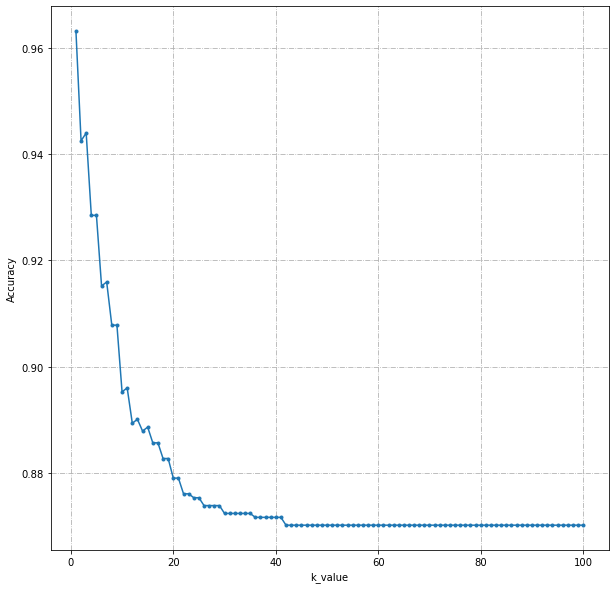

In [79]:
plt.figure(figsize=(10,10))
plt.plot(l1 , acc , marker = '.')
plt.grid(linestyle='-.')
plt.xlabel('k_value')
plt.ylabel('Accuracy')

#### SVM :-

In [118]:
from sklearn.svm import SVC
svc= SVC(class_weight='balanced',kernel='linear')
svc.fit(train_x ,train_y)
pred_svc = svc.predict(test_x)

In [119]:
tab_svc = confusion_matrix(test_y , pred_svc)
tab_svc = pd.DataFrame(tab_svc)
tab_svc.columns = ['ham','spam']
tab_svc.index = ['ham','spam']
tab_svc

,ham,spam
ham,1179,1
spam,17,159


In [120]:
print(classification_report(test_y , pred_svc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1180
           1       0.99      0.90      0.95       176

    accuracy                           0.99      1356
   macro avg       0.99      0.95      0.97      1356
weighted avg       0.99      0.99      0.99      1356

